# Udacity - Problem Solving with Advanced Analytics Exercise

Solving the final problem presented in the Udacity tutorial in python. 
https://www.udacity.com/course/problem-solving-with-advanced-analytics--ud976

First we need to look at the data. The tutorial recommends that we use histograms and scatterplots to evaluate the relationship and make sue it is linear. 

In [9]:
import pandas as pd #import the pandas module
import numpy as np #import numpy module

In [18]:
#read the csv into a dataframe
df = pd.read_csv ('/Users/jeangelj/Documents/training/linexdata.csv', sep=',')

In [19]:
#let's see how the data look like
df

,AverageNumberofTickets,NumberofEmployees,ValueofContract,Industry
0,1,51,25750,Retail
1,9,68,25000,Services
2,20,67,40000,Services
3,1,124,35000,Retail
4,8,124,25000,Manufacturing
5,30,134,50000,Services
6,20,157,48000,Retail
7,8,190,32000,Retail
8,20,205,70000,Retail
9,50,230,75000,Manufacturing


In [14]:
#import everything for data visualizations
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style('whitegrid') #set seaborn style as white background
%matplotlib inline 
#to always see our plots

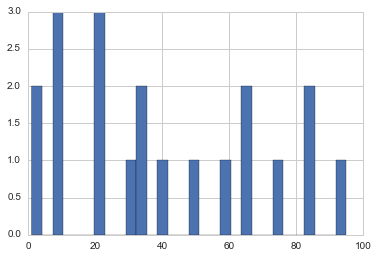

In [20]:
#histogram of what we are trying to predict (no normal distribution)
f = df.AverageNumberofTickets.hist(bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d30c3d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10d69b510>]], dtype=object)

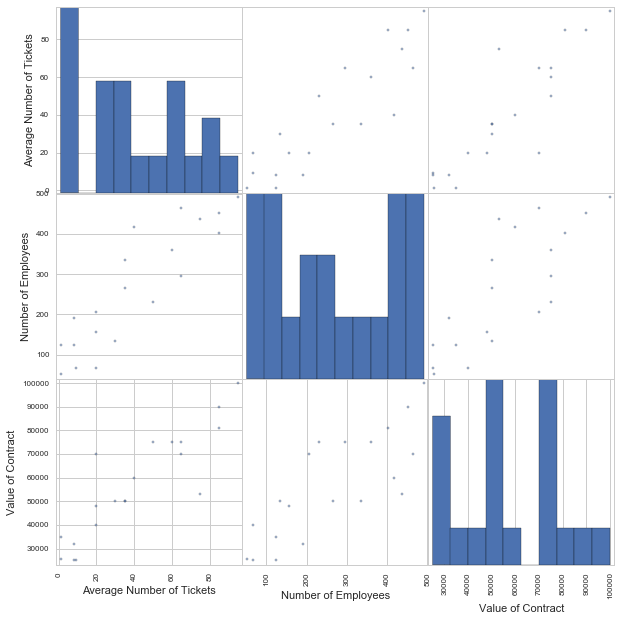

In [15]:
#scatterplots of all variables against each other
pd.scatter_matrix(df, figsize=(10,10))

There is a linear relationship as can be seen in the scatterplots.

In [21]:
#let's also look at some descriptive 
df.describe()

,AverageNumberofTickets,NumberofEmployees,ValueofContract
count,20.000000,20.000000,20.000000
mean,40.350000,263.550000,56487.500000
std,30.304203,147.853226,22353.981601
min,1.000000,51.000000,25000.000000
25%,17.250000,131.500000,38750.000000
50%,35.000000,247.500000,51500.000000
75%,65.000000,406.750000,75000.000000
max,95.000000,491.000000,100000.000000


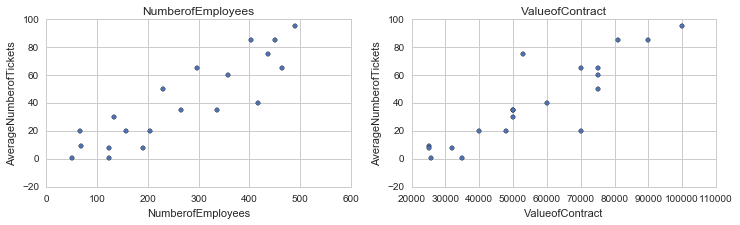

In [58]:
#scatterplots of the two numerical variables 
fig, axes = plt.subplots(ncols=2) 
f = df.plot(kind='scatter', x='NumberofEmployees', y='AverageNumberofTickets', ax=axes[0], title="NumberofEmployees", figsize=(12,3))
f = df.plot(kind='scatter', x='ValueofContract', y='AverageNumberofTickets', ax=axes[1], title="ValueofContract")

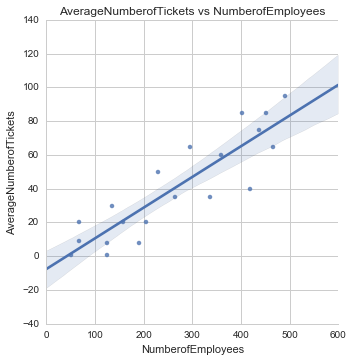

In [61]:
#if we want to use a trendline to see the linear relationship, we can use seaborn
f = sb.lmplot(x = 'NumberofEmployees', y='AverageNumberofTickets', data=df, ci=95)
f = plt.title("AverageNumberofTickets vs NumberofEmployees")

## Linear Regression

In [28]:
#now we will upload the linear regression model from sklearn
from sklearn.linear_model import LinearRegression

#so we don't have to keep on writing it out, let's call it model
model = LinearRegression()

#first let's try the model with one variable (so a linear regression)
#we specify what is X (predictor variable) and y (target variable)
X, y = df[['NumberofEmployees']], df.AverageNumberofTickets

#let's run the model
model.fit(X, y)

#let's see its r-squared
model.score(X, y)

0.78620714716141293

The score above is R-squared - the coefficient of determination. It is the percent variance in observations explained by the model. In other words, it shows how well the data fits the trend line. Closer to 1 means that nearly all variance in the target variable is explained by the model. 

In [29]:
# y- intercept 
model.intercept_

-7.5464782252213638

In [30]:
# slope 
model.coef_

array([ 0.18173583])

In [31]:
#you can use this neat function
model.__dict__

{'_residues': 3730.3752823967297,
 'coef_': array([ 0.18173583]),
 'copy_X': True,
 'fit_intercept': True,
 'intercept_': -7.5464782252213638,
 'n_jobs': 1,
 'normalize': False,
 'rank_': 1,
 'singular_': array([ 644.4772688])}

In [40]:
#or print the equation
coefs = zip(model.coef_, X.columns)
print "AverageNumberofTickets = %.3f + " % model.intercept_ + \
    " + ".join("%.3f %s" % coef for coef in coefs)

AverageNumberofTickets = -24.267 + 0.102 NumberofEmployees + 0.001 ValueofContract


## Multiple Linear Regression

In [45]:
#we will now use more than one x (multiple regression analysis)
X, y = df[['NumberofEmployees','ValueofContract']], df.AverageNumberofTickets
model.fit(X, y)
model.score(X, y)#r-squared

0.87764337132340009

In [41]:
coefs = zip(model.coef_, X.columns)
print "AverageNumberofTickets = %.3f + " % model.intercept_ + \
    " + ".join("%.3f %s" % coef for coef in coefs)

AverageNumberofTickets = -24.267 + 0.102 NumberofEmployees + 0.001 ValueofContract


Please note that this model gave us only r-squared and not the adjusted r-squared. 
Remeber (from Udacity): "The adjusted r-squared value should be used with multiple linear regressions due to a phenomenon that occurs when adding additional variables to the model. In a nutshell, the more variables that are included, the higher the r-squared value will be - even if there is no relationship between the additional variables and the target variable. Therefore, we use the Adjusted R-squared value."

## Multiple Linear Regression with categorical values

To use categorical variables in the regression analysis, we need to create dummy variables

In [42]:
#load the dmatrices module from patsy to create dummy variables in a matrix
from patsy import dmatrices

In [43]:
#Let's check how many categories we have in "Industry"
df['Industry'].value_counts()

Services         8
Retail           7
Manufacturing    5
Name: Industry, dtype: int64

There are 3 categories in "Industry", so we need 2 dummy variables. 

In [47]:
#let's create the dummy variables
y, X = dmatrices('AverageNumberofTickets ~ NumberofEmployees + ValueofContract + Industry', data=df, return_type='dataframe')

In [55]:
#I'm sure you want to see how those look like 
X.head()

,Intercept,Industry[T.Retail],Industry[T.Services],NumberofEmployees,ValueofContract
0,1,1,0,51,25750
1,1,0,1,68,25000
2,1,0,1,67,40000
3,1,1,0,124,35000
4,1,0,0,124,25000


In [48]:
#now let's run the model with those
model = LinearRegression()
model.fit(X, y).score(X, y)

0.96510710786128162

In [50]:
#voila - model ready
print model.intercept_
for i, val in zip(X.columns, model.coef_[0]):
   print i, val

[-18.45040543]
Intercept 0.0
Industry[T.Retail] -8.72535890413
Industry[T.Services] 12.4937810096
NumberofEmployees 0.111606827645
ValueofContract 0.000485820565963


## faster way

yes ... there is a faster way with ols

In [52]:
import statsmodels.formula.api as sm

In [53]:
model = sm.ols(formula="AverageNumberofTickets ~ NumberofEmployees + ValueofContract", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     AverageNumberofTickets   R-squared:                       0.878
Model:                                OLS   Adj. R-squared:                  0.863
Method:                     Least Squares   F-statistic:                     60.97
Date:                    Fri, 03 Feb 2017   Prob (F-statistic):           1.76e-08
Time:                            17:07:45   Log-Likelihood:                -75.083
No. Observations:                      20   AIC:                             156.2
Df Residuals:                          17   BIC:                             159.2
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept           -24.2667      7.020     -3.457      0.003       -39.079    -9.455
NumberofEmployees     0.1019      0.028      3.594      0.002         0.042     0.162
ValueofContract       0.0007      0.000      3.564      0.002         0.000     0.001
==============================================================================
Omnibus:                        0.901   Durbin-Watson:                   2.452
Prob(Omnibus):                  0.637   Jarque-Bera (JB):                0.511
Skew:                          -0.384   Prob(JB):                        0.775
Kurtosis:                       2.851   Cond. No.                     1.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Also this way gives us R-squared!**

In [54]:
model = sm.ols(formula='AverageNumberofTickets ~ NumberofEmployees + ValueofContract + Industry', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     AverageNumberofTickets   R-squared:                       0.965
Model:                                OLS   Adj. R-squared:                  0.956
Method:                     Least Squares   F-statistic:                     103.7
Date:                    Fri, 03 Feb 2017   Prob (F-statistic):           9.69e-11
Time:                            17:08:45   Log-Likelihood:                -62.537
No. Observations:                      20   AIC:                             135.1
Df Residuals:                          15   BIC:                             140.1
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              -18.4504      4.765     -3.872      0.002       -28.606    -8.295
Industry[T.Retail]      -8.7254      3.756     -2.323      0.035       -16.731    -0.720
Industry[T.Services]    12.4938      3.700      3.377      0.004         4.607    20.380
NumberofEmployees        0.1116      0.016      6.886      0.000         0.077     0.146
ValueofContract          0.0005      0.000      4.387      0.001         0.000     0.001
==============================================================================
Omnibus:                        0.884   Durbin-Watson:                   2.835
Prob(Omnibus):                  0.643   Jarque-Bera (JB):                0.716
Skew:                          -0.010   Prob(JB):                        0.699
Kurtosis:                       2.073   Cond. No.                     2.45e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note that you can read this output the same way as the Alteryx example in the exercise:

- coef: Those are the coefficient estimates that give use the regression equation.

- P>|t|: "The p value is the probability that observed results (the coefficient estimate) occurred by chance, and that there is no actual relationship between the predictor and target variable. In other words, the p-value is the probability that the coefficient is zero. The lower the p-value the higher the probability that a relationship exists between the predictor and target variable. If the p-value is high, we should not rely on the coefficient estimate. When a predictor variable has a p-value below 0.05, the relationship between it and the target variable is considered to be statistically significant."(from Udacity)

- Unfortunately there are no stars telling you how statistically significant the coefficients are, you need to juedge that yourself by the p-value (hint: Number of Employees is the most statistically significant one) 
"Statistical significance is a result that is not likely to occur randomly, but rather is likely to be attributable to a specific cause." 

- We also get the R-squared here and excitingly the Adjusted R-squared as well. They are very close to 1, so this model is very good. 


## the problem

- The new client has 732 employees, with a contract value that is worth $825,000, and is in the services industry.
- Your company currently has 23 help desk resources on staff, and each resource has a capacity of 125 tickets per week.
- The current average number of tickets that the help desk has been receiving is 2800 per week.

- Intercept: -18.45
- Number of Employees: 0.1116
- Value of Contract: 0.0004858
- Industry - Manufacturing: 0
- Industry - Retail: -8.725
- Industry - Services: 12.49

In [62]:
AverageNumberofTickets_newclient = -18.45 + (732* 0.1116) + (825000*0.0004858) + (-8.725*0)+ (12.49*1)

In [63]:
AverageNumberofTickets_newclient

476.51619999999997

So 477 extra tickets.

In [71]:
#what's the total capacity per week?
T_capactity = 23.0* 125.0
T_capactity

2875.0

We are currently receiving 2800 a week, so we have 75 we can use for the new client, this means that we still have 477 - 75 = 402 addtitional tickets

In [70]:
#so if we need 402 additional tickets to be processed, how many extra people do we need? 
extra_peops = 402.0/125.0
extra_peops

3.216

We need 4 extra help desk resources. 